# Project: Wrangling and Analyze Data

## Table of Contents

* [Data Gathering](#Data_Gathering)
* [Assessing Data](#Assessing_Data)
    * [Visual Assessment](#Visual_Assessment)
    * [Programmatic Assessment](#Programmatic_Assessment)
        * [Tweet Archive Data](#Tweet_Archive)
        * [Image Predictions Data](#Image_Predictions)
        * [Tweet Json data](#Tweet_Json)
        * [Quality Issues](#Quality_Issues)
        * [Tidiness Isuues](#Tidiness_issues)
* [Cleaning Data](#Cleaning_Data)
    * [Issue 1](#Issue_1)
    * [Issue 2](#Issue_2)
    * [Issue 3](#Issue_3)
    * [Issue 4](#Issue_4)
    * [Issue 5](#Issue_5)
    * [Issue 6](#Issue_6)
    * [Issue 7](#Issue_7)
    * [Issue 8](#Issue_8)
    * [Issue 9](#Issue_9)
    * [Issue 10](#Issue_10)
* [Storing Data](#Storing_Data)
* [Analyzing and Visualizing Data](#Analyzing_and_Visualizing_Data)
    * [Insights](#Insights:)
    * [Visualization](#Visualization)

## Data_Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
response = requests.get(url)
with open('twitter-archive-enhanced.csv', mode = 'wb') as file:
    file.write(response.content)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url2 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response2 = requests.get(url2)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response2.content)

In [3]:
url3 = 'https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py'
response3 = requests.get(url3)
with open('twitter-api.py', mode = 'wb') as file:
    file.write(response3.content)

In [4]:
url4 = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response4 = requests.get(url4)
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response4.content)

In [5]:
#Loading the csv data
import pandas as pd
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
#importing the tsv data

image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [7]:
data_list = []
import json

with open('tweet-json.txt', encoding = 'utf-8') as file:
    a = file.readlines()
    for tweet in a:
        b = json.loads(tweet)
        tweet_id = b['id']
        favourite_count = b['favorite_count']
        retweet_count = b['retweet_count']
        try:
            b['retweeted_status']
            retweeted_status = True
        except:
            retweeted_status = False
        data_list.append({'tweet_id': tweet_id , 'favourite_count': favourite_count, 'retweet_count': retweet_count, 'retweeted_status': retweeted_status})

  
tweet_json = pd.DataFrame(data_list, columns = ['tweet_id','favourite_count','retweet_count', 'retweeted_status'])
    

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

## Assessing_Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual_Assessment

In [9]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
tweet_json.sample(5)

,tweet_id,favourite_count,retweet_count,retweeted_status
2212,668544745690562560,561,250,False
1543,689289219123089408,2476,1056,False
1399,699434518667751424,2384,577,False
572,801167903437357056,27386,6961,False
329,833124694597443584,22133,5513,False


### Programmatic_Assessment

#### Tweet_Archive

In [12]:
tweet_archive.head(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


In [13]:
tweet_archive.tail(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [27]:
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2047,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,None,None,None,None
1019,746790600704425984,NaN,NaN,2016-06-25 19:42:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you just can't resist... 10/10 topnotch t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746790600...,10,10,None,None,None,None,None
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None,pupper,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
938,753294487569522689,NaN,NaN,2016-07-13 18:26:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ace. He's a window washer. One of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753294487...,11,10,Ace,None,None,None,None


In [14]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
tweet_archive[['retweeted_status_id','expanded_urls']].sample(6)

,retweeted_status_id,expanded_urls
709,NaN,https://twitter.com/dog_rates/status/785170936...
119,NaN,https://twitter.com/dog_rates/status/869772420...
337,NaN,https://twitter.com/dog_rates/status/832397543...
2310,NaN,https://twitter.com/dog_rates/status/666786068...
929,NaN,https://twitter.com/dog_rates/status/754482103...
2309,NaN,https://twitter.com/dog_rates/status/666804364...


In [17]:
tweet_archive['expanded_urls'].sample()

469    https://twitter.com/dog_rates/status/790946055...
Name: expanded_urls, dtype: object

In [18]:
for index, value in tweet_archive['expanded_urls'].iteritems():
    print(type(value))
    #print(len(value.split(',')))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<cla

In [22]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
tweet_archive[tweet_archive['rating_denominator']>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [24]:
tweet_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
tweet_archive.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [26]:
tweet_archive[tweet_archive['rating_numerator']>100]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [27]:
tweet_archive['rating_numerator'][979]

1776

In [28]:
tweet_archive['text'][979]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [29]:
tweet_archive['tweet_id'][979]

749981277374128128

In [30]:
tweet_archive[tweet_archive['rating_numerator']==11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
112,870804317367881728,NaN,NaN,2017-06-03 00:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870804317...,11,10,None,None,None,None,None
152,862722525377298433,NaN,NaN,2017-05-11 17:34:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He passed the h*ck out. It's bar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862722525...,11,10,Dave,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,667160273090932737,NaN,NaN,2015-11-19 01:59:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667160273...,11,10,Bradlay,None,None,None,None
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947...,11,10,a,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None


In [32]:
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [33]:
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [34]:
tweet_archive[['text','rating_numerator']].sample(5)

,text,rating_numerator
1051,"For anyone who's wondering, this is what happe...",11
1368,This is a Wild Tuscan Poofwiggle. Careful not ...,12
1891,These two pups are masters of camouflage. Very...,10
81,This is Nelly. He graduated with his dogtorate...,12
153,"This is Jersey. He likes to watch movies, but ...",13


In [35]:
import re
pattern = re.compile(r'\d+\.\d*\/\d+')
pattern2 = re.compile(r'\d+\/\d+')
for index, value in tweet_archive['text'].iteritems():
    matches = re.findall(pattern2,value)
    if len(matches)>1:
        print(matches, index)
        print(value)

['17/10', '13/10'] 55
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
['960/00', '13/10'] 313
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
['12/10', '11/10'] 561
RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
['12/10', '11/10'] 766
"Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
['9/11', '14/10'] 784
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
['8/10', '11/10'] 860
RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…
['10/10', '7/10'] 1007
This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUG

In [36]:
tweet_archive.loc[55]

tweet_id                                                     881633300179243008
in_reply_to_status_id                                      881607037314052096.0
in_reply_to_user_id                                                  47384430.0
timestamp                                             2017-07-02 21:58:53 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @roushfenway These are good dogs but 17/10 is ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             17
rating_denominator                                                           10
name                                    

In [37]:
tweet_archive.loc[313]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                      835245984028504064.0
in_reply_to_user_id                                                  26259576.0
timestamp                                             2017-02-24 21:54:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                            960
rating_denominator                                                            0
name                                    

# Image_Predictions

In [38]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
1088,718971898235854848,https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg,1,golden_retriever,0.140394,True,Saint_Bernard,0.118769,True,Labrador_retriever,0.075492,True


In [40]:
image_predictions.jpg_url[431]

'https://pbs.twimg.com/media/CVt-SeMWwAAs9HH.jpg'

In [41]:
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### Tweet_Json

In [42]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   tweet_id          2354 non-null   int64
 1   favourite_count   2354 non-null   int64
 2   retweet_count     2354 non-null   int64
 3   retweeted_status  2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


In [43]:
tweet_json.dtypes

tweet_id            int64
favourite_count     int64
retweet_count       int64
retweeted_status     bool
dtype: object

In [44]:
tweet_json.sample(5)

,tweet_id,favourite_count,retweet_count,retweeted_status
304,836260088725786625,23177,4850,False
77,877611172832227328,0,83,True
1962,673350198937153538,784,229,False
2286,667176164155375616,640,484,False
2083,670804601705242624,2098,1035,False


In [45]:
tweet_json.describe()

,tweet_id,favourite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [46]:
tweet_json.sample(5)

,tweet_id,favourite_count,retweet_count,retweeted_status
1647,683742671509258241,7162,3781,False
1940,673711475735838725,1114,325,False
729,781661882474196992,11634,3129,False
1094,736365877722001409,4367,1408,False
1315,706593038911545345,2363,718,False


#### Quality_Issues

##### Tweet Archive dataframe

1. Unoriginal tweets are included

2. Redundant columns in the archieve dataframe

3. Decimals ratings and tweet more than 1 ratings mentioned were truncated wrongly

4. The source column is not properly formatted

5. Incorrect datatype for tweet, timestamp
6. Inconsistent dog names
7. Incorrect entries at the expanded URL column

##### Tweet Json dataframe

7. Retweet data

7. Incorrect datatype for tweet


##### Image definitions data

8. Incorrect data type for tweet

#### Tidiness_issues

1. The dog categorizations can be merged into a single column

2. Merge the 3 dataframes for proper analysis

## Cleaning_Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [47]:
# Make copies of original pieces of data
clean_archive = tweet_archive.copy()
clean_tweet_json = tweet_json.copy()
clean_images = image_predictions.copy()

### Issue_1

### Issue #1: Non-Original tweet are included in the archive data

#### Define: Remove retweets from dataframe and drop retweet related columns

#### Code

In [48]:
clean_archive.query('retweeted_status_user_id.isnull()', inplace = True)

#### Test

In [49]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue_2

### Issue #2: Redundant columns in the archieve dataframe

#### Define

Remove in_reply_to_status_id, in_reply_to_user_id,  retweeted_status_id , retweeted_status_timestamp

#### Code

In [50]:
clean_archive = clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'] , axis=1)

#### Test

In [51]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue_3

### Issue #3: Decimals ratings and tweet with more than 1 ratings mentioned were truncated wrongly

#### Define

1. Pick the final score mention in any tweet with more than one rating
2. Correctly place decimals where they exist

#### Code

In [52]:

import re
pattern = re.compile(r'\d+\.?\d*\/\d+')
for index, value in clean_archive['text'].iteritems():
    matches = re.findall(pattern,value)
    ratings = matches[-1].split("/")
    clean_archive['rating_numerator'][index]=ratings[0]
    clean_archive['rating_denominator'][index] = ratings[1]


C:\Users\AJI\AppData\Local\Temp\ipykernel_21280\1614836049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive['rating_numerator'][index]=ratings[0]
C:\Users\AJI\AppData\Local\Temp\ipykernel_21280\1614836049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive['rating_denominator'][index] = ratings[1]


#### Test

In [53]:
clean_archive['rating_numerator'].value_counts()

12       500
10       435
11       427
13       311
9        155
8        101
7         54
14        44
5         33
6         33
3         19
4         17
2         10
1          8
420        2
0          2
143        1
80         1
121        1
20         1
9.5        1
44         1
11.26      1
144        1
60         1
45         1
165        1
99         1
204        1
1776       1
666        1
13.5       1
11.27      1
9.75       1
24         1
84         1
007        1
15         1
182        1
88         1
Name: rating_numerator, dtype: int64

### Issue_4

### Issue4: The Source column of the archieve data is not properly formatted

#### Define

Extract only the source data

#### Code

In [54]:
clean_archive.source.value_counts()
clean_archive.source = clean_archive.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [55]:
clean_archive.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue_5

### Issue5: Datatypes accross the 3 dataframes are not properly aligned

#### Define

Change the data types of the tweet id and timestamp columns

#### Code

In [56]:
#tweet to str
clean_archive.tweet_id = clean_archive.tweet_id.astype(str)
clean_images.tweet_id = clean_images.tweet_id.astype(str)
clean_tweet_json.tweet_id = clean_tweet_json.tweet_id.astype(str)

# timestamp to datetime
clean_archive.timestamp = pd.to_datetime(clean_archive.timestamp)

# source to category 
clean_archive.source = clean_archive.source.astype("category")

#### Test

In [57]:
clean_archive.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                   object
rating_denominator                 object
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [58]:
clean_images.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [59]:
clean_tweet_json.dtypes

tweet_id            object
favourite_count      int64
retweet_count        int64
retweeted_status      bool
dtype: object

### Issue_6

### Issue6: Inconsistent dog names

#### Define

Make all invalid names to be None values. An invalid will be any letter starting with a small letter

#### Code

In [60]:
clean_archive.loc[clean_archive.name.str.match(r'[a-z]+'), 'name'] = 'None'

#### Test

In [61]:
clean_archive.name.value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

### Issue_7

### Issue7: Retweet data in tweet_json 

#### Define

Remove all retweets from the tweet_json dataframe

#### Code

In [62]:
clean_tweet_json = clean_tweet_json.query('retweeted_status == False')

#### Test

In [63]:
clean_tweet_json.retweeted_status.value_counts()

False    2175
Name: retweeted_status, dtype: int64

### Issue_8

### Issue8: Inconsistent data in the expanded url column in the archive database

#### Define

Reconstrut the column using the tweet id

#### Code

In [64]:
clean_archive['expanded_urls'] = 'https://twitter.com/dog_rates/status'+clean_archive['tweet_id']

#### Test

In [65]:
clean_archive.expanded_urls.isnull().sum()

0

### Issue_9

### Issue9: The dog categorizations can be merged into a single column

### Define

Reframe the following columns into a single column named dog_stage -- doggo, floofer, pupper, puppo. Ensure that stage is only retained for dogs who belong to only one, if a dog belongs to more than one category, return none

### Code

In [66]:
clean_archive['dog_stage'] = 'None'

In [67]:
clean_archive.head(1)
helper = []
for i,v in clean_archive.dog_stage.iteritems():
    doggo = clean_archive.doggo.loc[i]
    floofer = clean_archive.floofer.loc[i]
    pupper = clean_archive.pupper.loc[i]
    puppo = clean_archive.puppo.loc[i]
    helper = [doggo,floofer,pupper,puppo]
    if helper.count('None') == 3:
        if helper[0] != 'None':
            clean_archive.dog_stage.loc[i] = 'doggo'
        elif helper[1] != 'None':
            clean_archive.dog_stage.loc[i] = 'floofer'
        elif helper[2] != 'None':
            clean_archive.dog_stage.loc[i] = 'pupper'
        elif helper[3] != 'None':
            clean_archive.dog_stage.loc[i] = 'puppo'

C:\Users\AJI\AppData\Local\Temp\ipykernel_21280\2445462250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive.dog_stage.loc[i] = 'doggo'
C:\Users\AJI\AppData\Local\Temp\ipykernel_21280\2445462250.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive.dog_stage.loc[i] = 'puppo'
C:\Users\AJI\AppData\Local\Temp\ipykernel_21280\2445462250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive.dog_sta

In [68]:
#drop the redundant columns

clean_archive = clean_archive.drop(['doggo','floofer','pupper','puppo'] , axis=1)


### Test

In [69]:
clean_archive.dog_stage.value_counts()

None       1843
pupper      224
doggo        75
puppo        24
floofer       9
Name: dog_stage, dtype: int64

In [70]:
clean_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status8924206435...,13,10,Phineas,None


### Issue_10

### Issue10: Merge all 3 dataframes to enable analysis

#### Define

Merge all 3 dataframe with the tweet_id as key

#### Code

In [71]:
clean_archive = pd.merge(left=clean_archive, right=clean_tweet_json, how='left', on='tweet_id')
clean_archive = pd.merge(left=clean_archive, right=clean_images, how='left', on='tweet_id')

In [72]:
#droppping any null columns because of the missing values on the images dataframe

clean_archive.dropna(axis = 0, inplace=True) 

#### Test

In [73]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   category           
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   object             
 6   rating_denominator  1994 non-null   object             
 7   name                1994 non-null   object             
 8   dog_stage           1994 non-null   object             
 9   favourite_count     1994 non-null   int64              
 10  retweet_count       1994 non-null   int64              
 11  retweeted_status    1994 non-null   bool               
 12  jpg_url             1994 non-null 

## Storing_Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
clean_archive.to_csv('twitter_archive_master.csv', index=False)

## Analyzing_and_Visualizing_Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [76]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,favourite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,12.215035,10.510030,8895.725677,2766.753260,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,41.463367,7.261522,12213.193181,4674.698447,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,7.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,10.000000,10.000000,1982.000000,624.750000,1.000000,0.362857,5.393987e-02,1.619283e-02
50%,7.084748e+17,11.000000,10.000000,4136.000000,1359.500000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,12.000000,10.000000,11308.000000,3220.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [77]:
ratings_in_decimals = twitter_archive_master.rating_numerator/twitter_archive_master.rating_denominator

In [78]:
ratings_in_decimals.value_counts()

1.200000      454
1.000000      413
1.100000      403
1.300000      263
0.900000      151
0.800000       98
0.700000       53
1.400000       36
0.600000       33
0.500000       31
0.300000       19
0.400000       16
0.200000       10
0.100000        5
0.000000        2
177.600000      1
1.126000        1
1.127000        1
0.975000        1
3.428571        1
1.350000        1
42.000000       1
dtype: int64

### Insights:
1. Dogs ratings equivalent to 1.2 is the most common with 454 dogs rated 1.2

2. The most liked tweet has 132810 likes

3. The most retweeted tweet has 79515 retweets

### Visualization

The tweet source was used to prepare a histogram

Matplotlib is building the font cache; this may take a moment.


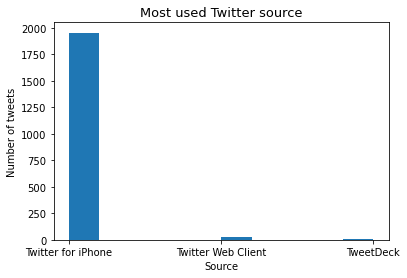

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(twitter_archive_master.source);

#Add labels
plt.title('Most used Twitter source', color = 'black', fontsize = '13');
plt.xlabel('Source', color = 'black', fontsize = '10');
plt.ylabel('Number of tweets', color = 'black', fontsize = '10');